In [175]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [176]:
# Load the dataset
dataset = pd.read_csv(r"../Supervised Learning/Algorithms in Supervised Learning/Regression Algorithms/Simple Linear Regression/Data/Salary_dataset.csv")

# Display the first few rows of the dataset
print(dataset.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


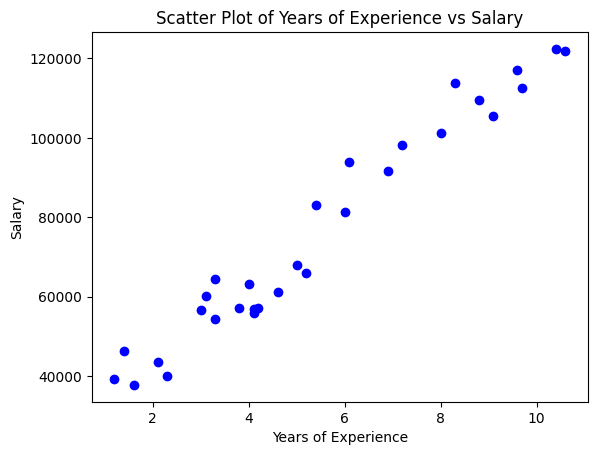

In [177]:
# Visualize the relationship between Years of Experience and Salary
plt.scatter(dataset["YearsExperience"], dataset["Salary"], color='blue')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Scatter Plot of Years of Experience vs Salary")
plt.show()

In [178]:
# Define features (X) and target (y)
X = dataset[["YearsExperience"]]  # Independent variable
y = dataset["Salary"]  # Dependent variable

In [179]:
lr = LinearRegression()

lr.fit(X, y)
print(lr.coef_, lr.intercept_) 

[9449.96232146] 24848.203966523193


In [180]:
def GradientDescent(X,y,LearningRate,epochs):
    m = 0
    b = 80000
    
    for i in range (epochs):
        y_pred = m * X.squeeze() + b
        
        slopefor_b = -2 * np.sum(y-y_pred)
        slopefor_m = -2 * np.sum((y-y_pred)*X.squeeze())
        
        m -= ( LearningRate * slopefor_m )
        b -= ( LearningRate * slopefor_b )
        
    return m,b

In [181]:
# Custom implementation of a Linear Regression model using Gradient Decent
class LinearRegression:
    def __init__(self):
        """Initialize the model with placeholders for slope and intercept."""
        self.coef_ = None  # Slope (m)
        self.intercept_ = None  # Intercept (b)

    def fit(self, X, y):
        m , b = GradientDescent(X,y,0.00065,500)
        self.coef_ = m
        self.intercept_ = b
    def predict(self, X):
        """
        Predict the target values for given input features.
        Arguments:
        - X: Input features, can be a list, NumPy array, or DataFrame.
        Returns:
        - Predicted values as a NumPy array.
        """
        # Convert input to a NumPy array if necessary
        if isinstance(X, list):
            X = np.array(X)
        if isinstance(X, pd.DataFrame):
            X = X.values
        
        # Calculate predictions
        y_pred = []
        for i in range(X.shape[0]):
            prediction = self.intercept_ + (self.coef_ * X[i])
            y_pred.append(prediction)
        
        return np.ravel(y_pred)

In [173]:
# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X, y)

# Retrieve the slope (m) and intercept (b)
m = lr.coef_  # Slope
b = lr.intercept_  # Intercept
print(f"Slope (m): {m}, Intercept (b): {b}")

Slope (m): 9304.625735949025, Intercept (b): 25838.45709887293


9304.625735949025 25838.45709887293


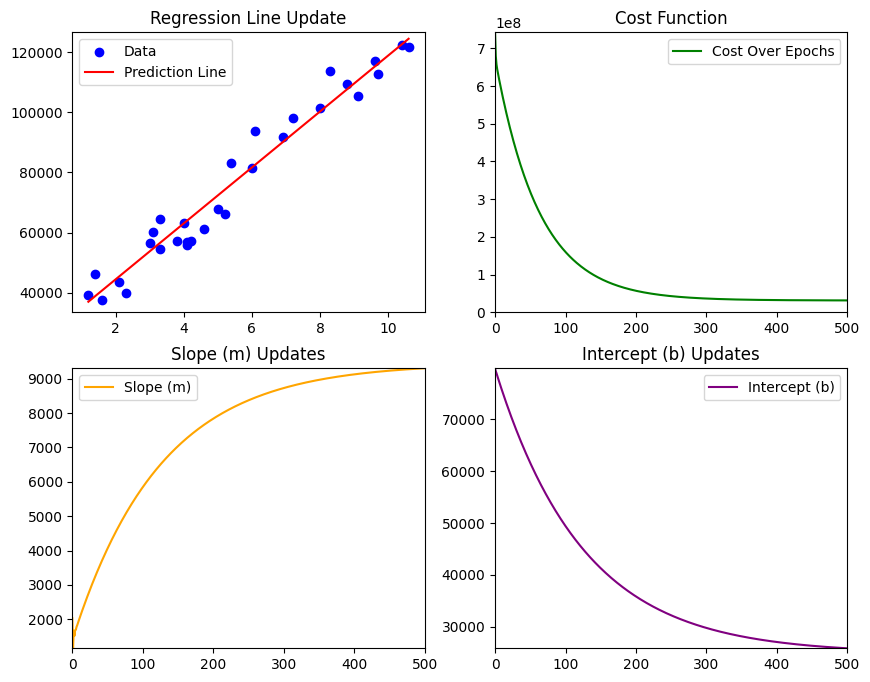

In [174]:
#  Just for Visual person no need to read the code
from matplotlib.animation import FuncAnimation
# Gradient Descent function
def GradientDescent(X, y, LearningRate, epochs):
    m, b = 0,80000
    n = len(X)

    # Storing values for visualization
    cost_history = []
    m_history = []
    b_history = []

    for _ in range(epochs):
        y_pred = m * X.squeeze() + b
        cost = np.mean((y - y_pred) ** 2)
        
        slopefor_m = (-2) * np.sum((y - y_pred) * X.squeeze())
        slopefor_b = (-2) * np.sum(y - y_pred)
        
        m -= LearningRate * slopefor_m
        b -= LearningRate * slopefor_b

        # Store values for animation
        cost_history.append(cost)
        m_history.append(m)
        b_history.append(b)

    return m, b, m_history, b_history, cost_history

# Run Gradient Descent
epochs = 500
LearningRate = 0.00065
m, b, m_history, b_history, cost_history = GradientDescent(X, y, LearningRate, epochs)
print (m,b)
# Initialize the plot for animation
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax1, ax2, ax3, ax4 = axes.flatten()

# 1. Top-left: Regression line update
ax1.set_title("Regression Line Update")
ax1.scatter(X, y, color='blue', label='Data')
line, = ax1.plot([], [], color='red', label='Prediction Line')
ax1.legend()

# 2. Top-right: Cost Function Decrease
ax2.set_title("Cost Function")
ax2.set_xlim(0, epochs)
ax2.set_ylim(0, max(cost_history))
cost_line, = ax2.plot([], [], color='green', label='Cost Over Epochs')
ax2.legend()

# 3. Bottom-left: Slope updates
ax3.set_title("Slope (m) Updates")
ax3.set_xlim(0, epochs)
ax3.set_ylim(min(m_history), max(m_history))
m_line, = ax3.plot([], [], color='orange', label='Slope (m)')
ax3.legend()

# 4. Bottom-right: Intercept updates
ax4.set_title("Intercept (b) Updates")
ax4.set_xlim(0, epochs)
ax4.set_ylim(min(b_history), max(b_history))
b_line, = ax4.plot([], [], color='purple', label='Intercept (b)')
ax4.legend()

# Animation update function
def update(frame):
    # Update regression line
    y_pred_line = m_history[frame] * X + b_history[frame]
    line.set_data(X, y_pred_line)

    # Update cost function plot
    cost_line.set_data(range(frame + 1), cost_history[:frame + 1])

    # Update slope and intercept
    m_line.set_data(range(frame + 1), m_history[:frame + 1])
    b_line.set_data(range(frame + 1), b_history[:frame + 1])
    return line, cost_line, m_line, b_line

# Create the animation
ani = FuncAnimation(fig, update, frames=epochs, interval=200, blit=True)

# Save the animation as a video
ani.save("gradient_descent_animation.gif", writer='ffmpeg', fps=10)

plt.show()